In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pip install plotly

     |████████████████████████████████| 28.8 MB 311 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_btb = pd.read_csv("/Users/nagarajgurusamy/Downloads/ipl/IPL Ball-by-Ball 2008-2020.csv")

In [3]:
df_btb[(df_btb['batsman']=='V Kohli') & (df_btb['is_wicket'] == 1)]['dismissal_kind'].value_counts()

caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: dismissal_kind, dtype: int64

In [6]:
df_btb.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [7]:
df_btb[(df_btb['batsman']=='V Kohli') & (df_btb['is_wicket'] == 1) & (df_btb['over']<=6)]['dismissal_kind'].shape

(52,)

In [8]:
df_btb[(df_btb['batsman']=='V Kohli') & (df_btb['is_wicket'] == 1) & (df_btb['over']<=6)]['dismissal_kind'].value_counts()

caught     31
bowled     11
run out     5
lbw         5
Name: dismissal_kind, dtype: int64

In [9]:
len(df_btb.groupby('id').groups)

816

In [11]:
df_m = pd.read_csv("/Users/nagarajgurusamy/Downloads/ipl//IPL Matches 2008-2020.csv")

In [12]:
df_m.shape

(816, 17)

In [13]:
df_m.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [14]:
df_m[(df_m['team1']=='Royal Challengers Bangalore') | (df_m['team2']=='Royal Challengers Bangalore')].shape

(195, 17)

In [15]:
df_btb.groupby('batsman')['id'].count()['V Kohli']

4609

In [16]:
df_btb[df_btb['batsman']=='V Kohli'].shape[0]

4609

In [17]:
df_btb.groupby('batsman')['batsman_runs'].sum()['V Kohli']

5878

In [18]:
df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'].max()

113

In [19]:
df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'].min()

0

In [20]:
df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'].count()

184

In [21]:
scrs = list(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'].sort_values(ascending = False))

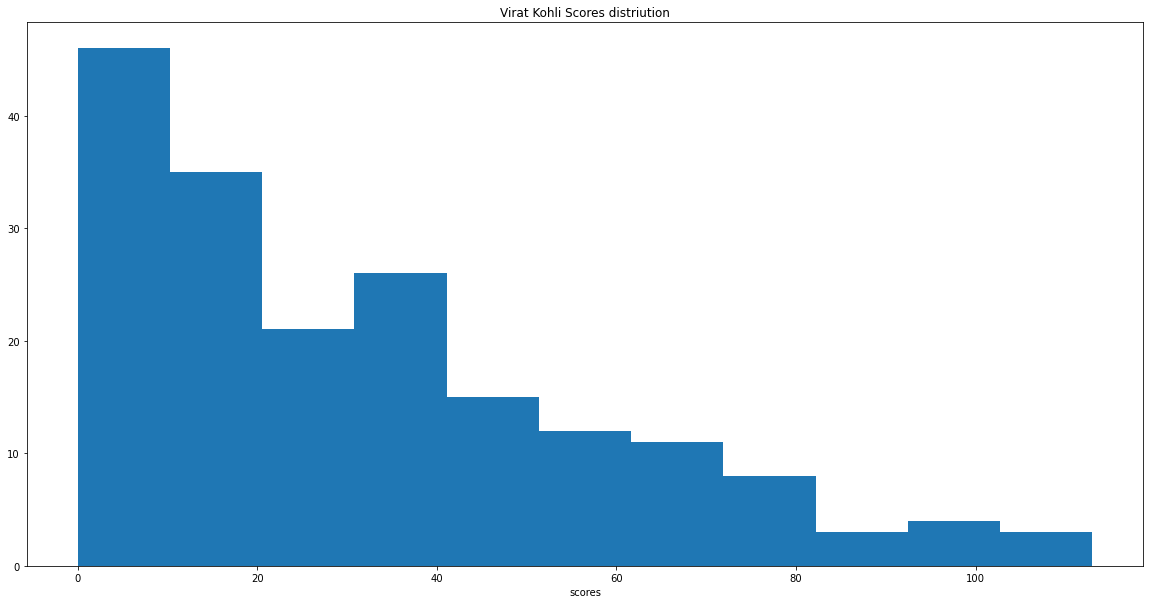

In [22]:
plt.figure(figsize=(20,10))
plt.hist(scrs,bins=11)
plt.xlabel('scores')
plt.title('Virat Kohli Scores distriution')
plt.show()

In [5]:
topten = ['V Kohli','S Dhawan','RG Sharma','SK Raina','DA Warner','AB de Villiers','CH Gayle','MS Dhoni','RV Uthappa','G Gambhir']

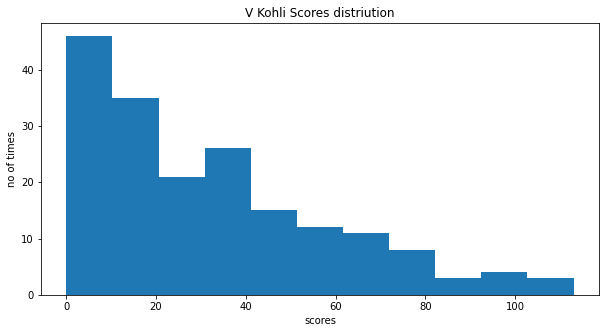

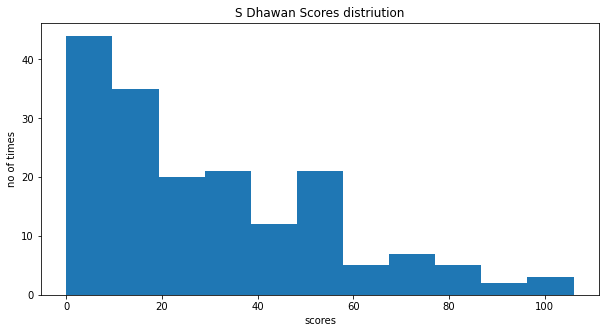

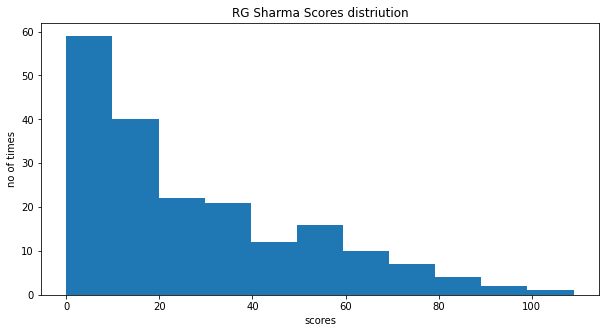

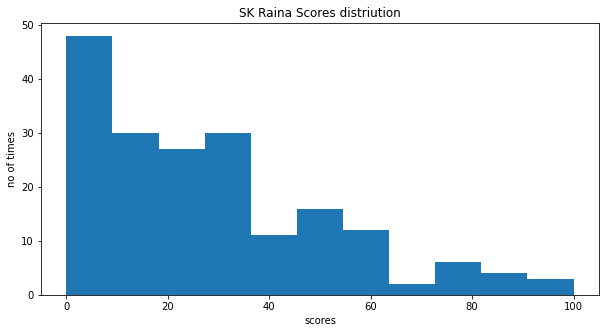

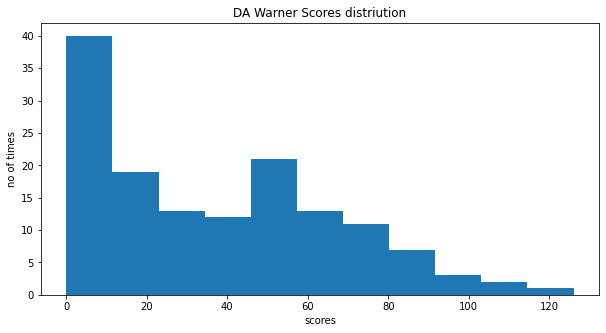

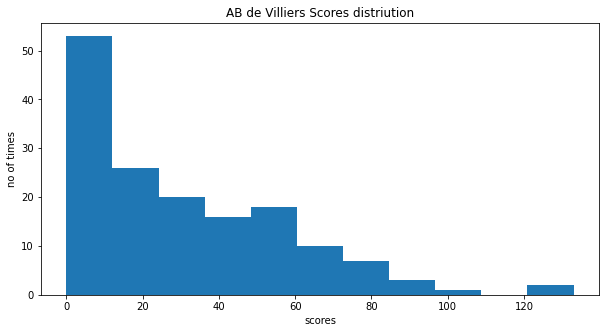

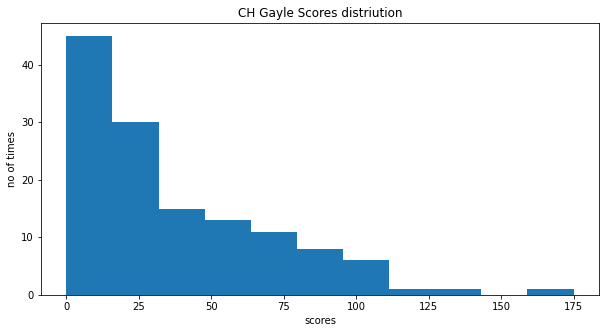

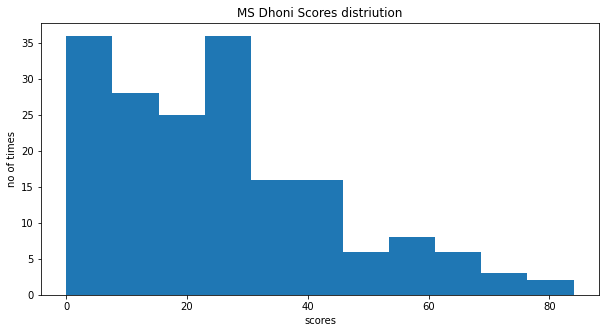

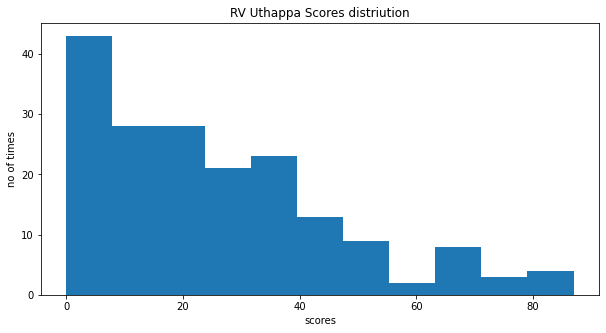

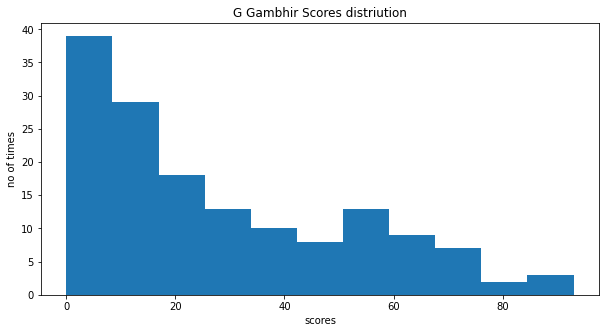

In [7]:
for i in topten:
    scrs = list(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()[i])
    plt.figure(figsize=(10,5))
    plt.hist(scrs,bins=11)
    plt.xlabel('scores')
    plt.ylabel('no of times')
    plt.title(i+' Scores distriution')
    plt.show()

In [25]:
all_scores = df_btb.groupby(['id','batsman'])['batsman_runs'].sum()

In [26]:
all_scores.values.mean()

19.729074165433317

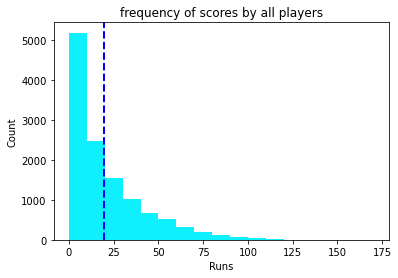

In [27]:
bins=range(0,180,10)
plt.hist(all_scores.values,bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
plt.xlabel('Runs')
plt.ylabel('Count')
plt.title('frequency of scores by all players')
plt.axvline(all_scores.values.mean(), color='b', linestyle='dashed', linewidth=2)
plt.plot()
plt.show()

In [28]:
df_vk_scores = pd.DataFrame(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'].value_counts())
df_vk_scores['score'] = df_vk_scores.index
df_vk_scores.reset_index(inplace=True)
df_vk_scores.drop('index',axis=1,inplace=True)
df_vk_scores['no_of_times']= df_vk_scores['batsman_runs']
df_vk_scores.drop('batsman_runs',axis=1,inplace=True)

In [29]:
df_vk_scores.head()

,score,no_of_times
0,1,7
1,9,6
2,0,6
3,3,6
4,16,5


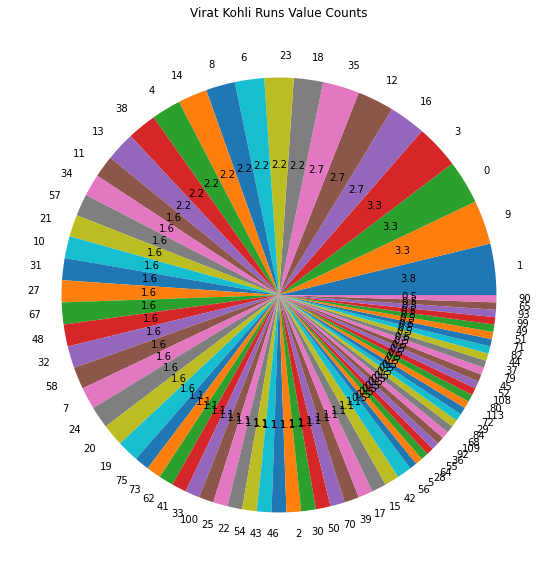

In [30]:
bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=df_vk_scores['no_of_times'], autopct="%.1f",labels = df_vk_scores['score'])
plt.title("Virat Kohli Runs Value Counts")
plt.show()

In [31]:
poms = list(df_m[df_m['player_of_match']=='V Kohli']['id'])

In [32]:
len(poms)

13

In [33]:
for i in poms:
    print(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'][i])

56
67
65
93
56
44
100
108
75
113
54
100
90


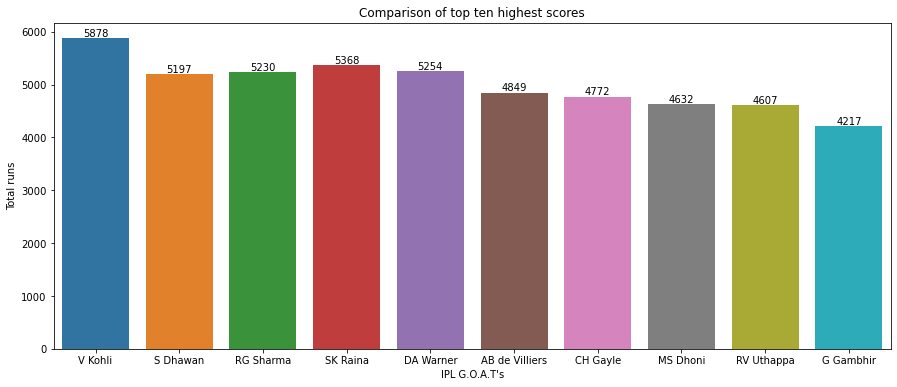

In [34]:
bar, ax= plt.subplots(figsize=(15,6))
ttscores=[]
k = [i for i in range(0,10)]
for player in topten:
    ttscores.append(df_btb.groupby('batsman')['batsman_runs'].sum()[player])
sns.barplot(x=topten,
            y= ttscores
           )
ax.set_xlabel("IPL G.O.A.T's")
ax.set_ylabel("Total runs")
ax.set_title('Comparison of top ten highest scores')
for i in range(len(ttscores)):
    plt.annotate(str(ttscores[i]),xy=(k[i],ttscores[i]),ha='center', va='bottom')
plt.show()

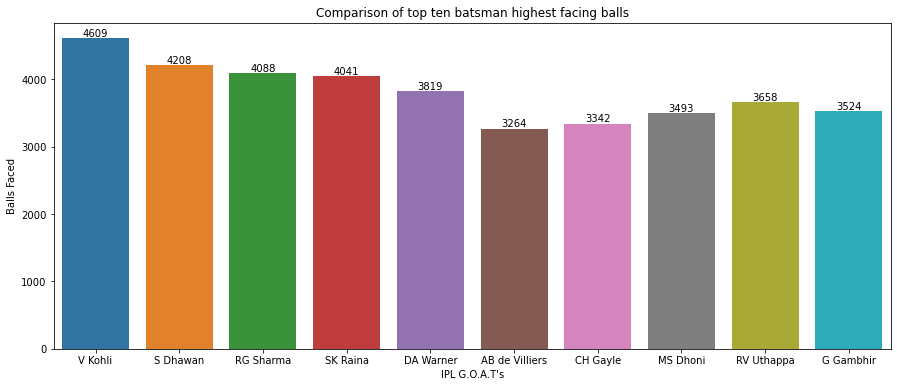

In [35]:
bar, ax= plt.subplots(figsize=(15,6))
ttballs=[]
k = [i for i in range(0,10)]
for player in topten:
    ttballs.append(df_btb[df_btb['batsman']==player].shape[0])
sns.barplot(x=topten,
            y= ttballs
           )
ax.set_xlabel("IPL G.O.A.T's")
ax.set_ylabel("Balls Faced")
ax.set_title('Comparison of top ten batsman highest facing balls')
for i in range(len(ttballs)):
    plt.annotate(str(ttballs[i]),xy=(k[i],ttballs[i]),ha='center', va='bottom')
plt.show()

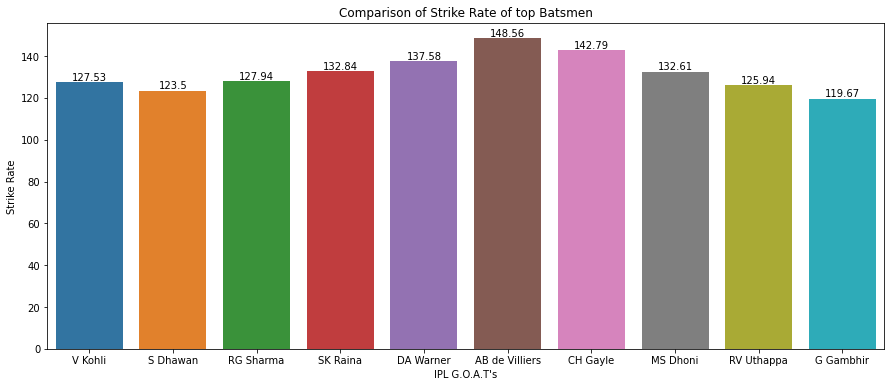

In [36]:
bar, ax= plt.subplots(figsize=(15,6))
ttstrike=[]
k = [i for i in range(0,10)]
for player in topten:
    ttstrike.append(round((df_btb.groupby('batsman')['batsman_runs'].sum()[player])/(df_btb[df_btb['batsman']==player].shape[0])*100,2))
sns.barplot(x=topten,
            y= ttstrike
           )
ax.set_xlabel("IPL G.O.A.T's")
ax.set_ylabel("Strike Rate")
ax.set_title('Comparison of Strike Rate of top Batsmen')
for i in range(len(ttstrike)):
    plt.annotate(str(ttstrike[i]),xy=(k[i],ttstrike[i]),ha='center', va='bottom')
plt.show()

+++++++++++++++++ Man of Matches held by top players +++++++++++++++++


V Kohli 13


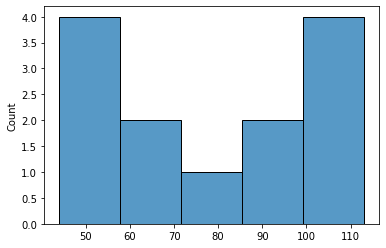

S Dhawan 8


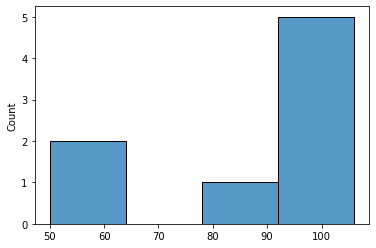

RG Sharma 18


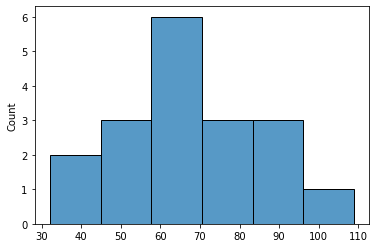

SK Raina 14


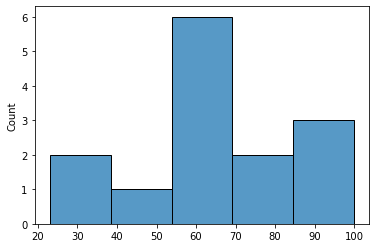

DA Warner 17


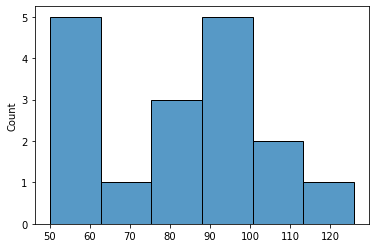

AB de Villiers 23


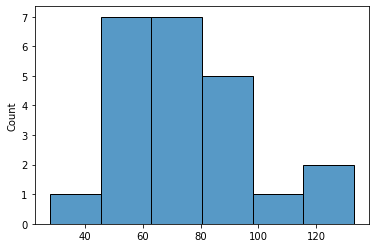

CH Gayle 22


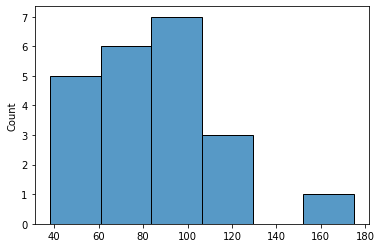

MS Dhoni 17


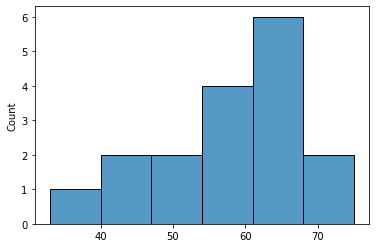

RV Uthappa 7


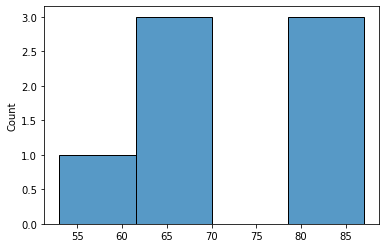

G Gambhir 13


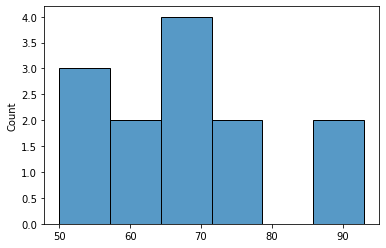

In [37]:
print("+++++++++++++++++ Man of Matches held by top players +++++++++++++++++")
print()
print()
for player in topten:
    print(player,df_m[df_m['player_of_match']==player]['id'].count())
    poms = list(df_m[df_m['player_of_match']==player]['id'])
    sc =[]
    for i in poms:
        sc.append(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()[player][i])
    sns.histplot(sc)
    plt.show()

In [38]:
df_m[df_m['winner']=='Royal Challengers Bangalore'].shape

(91, 17)

In [39]:
winids = list(df_m[df_m['winner']=='Royal Challengers Bangalore']['id'])

In [40]:
vk_runs = df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli']

In [41]:
win_sco = []
cnt=0
for id in winids:
    if id in vk_runs:
        cnt+=1
        win_sco.append(vk_runs[id])

In [42]:
cnt

84

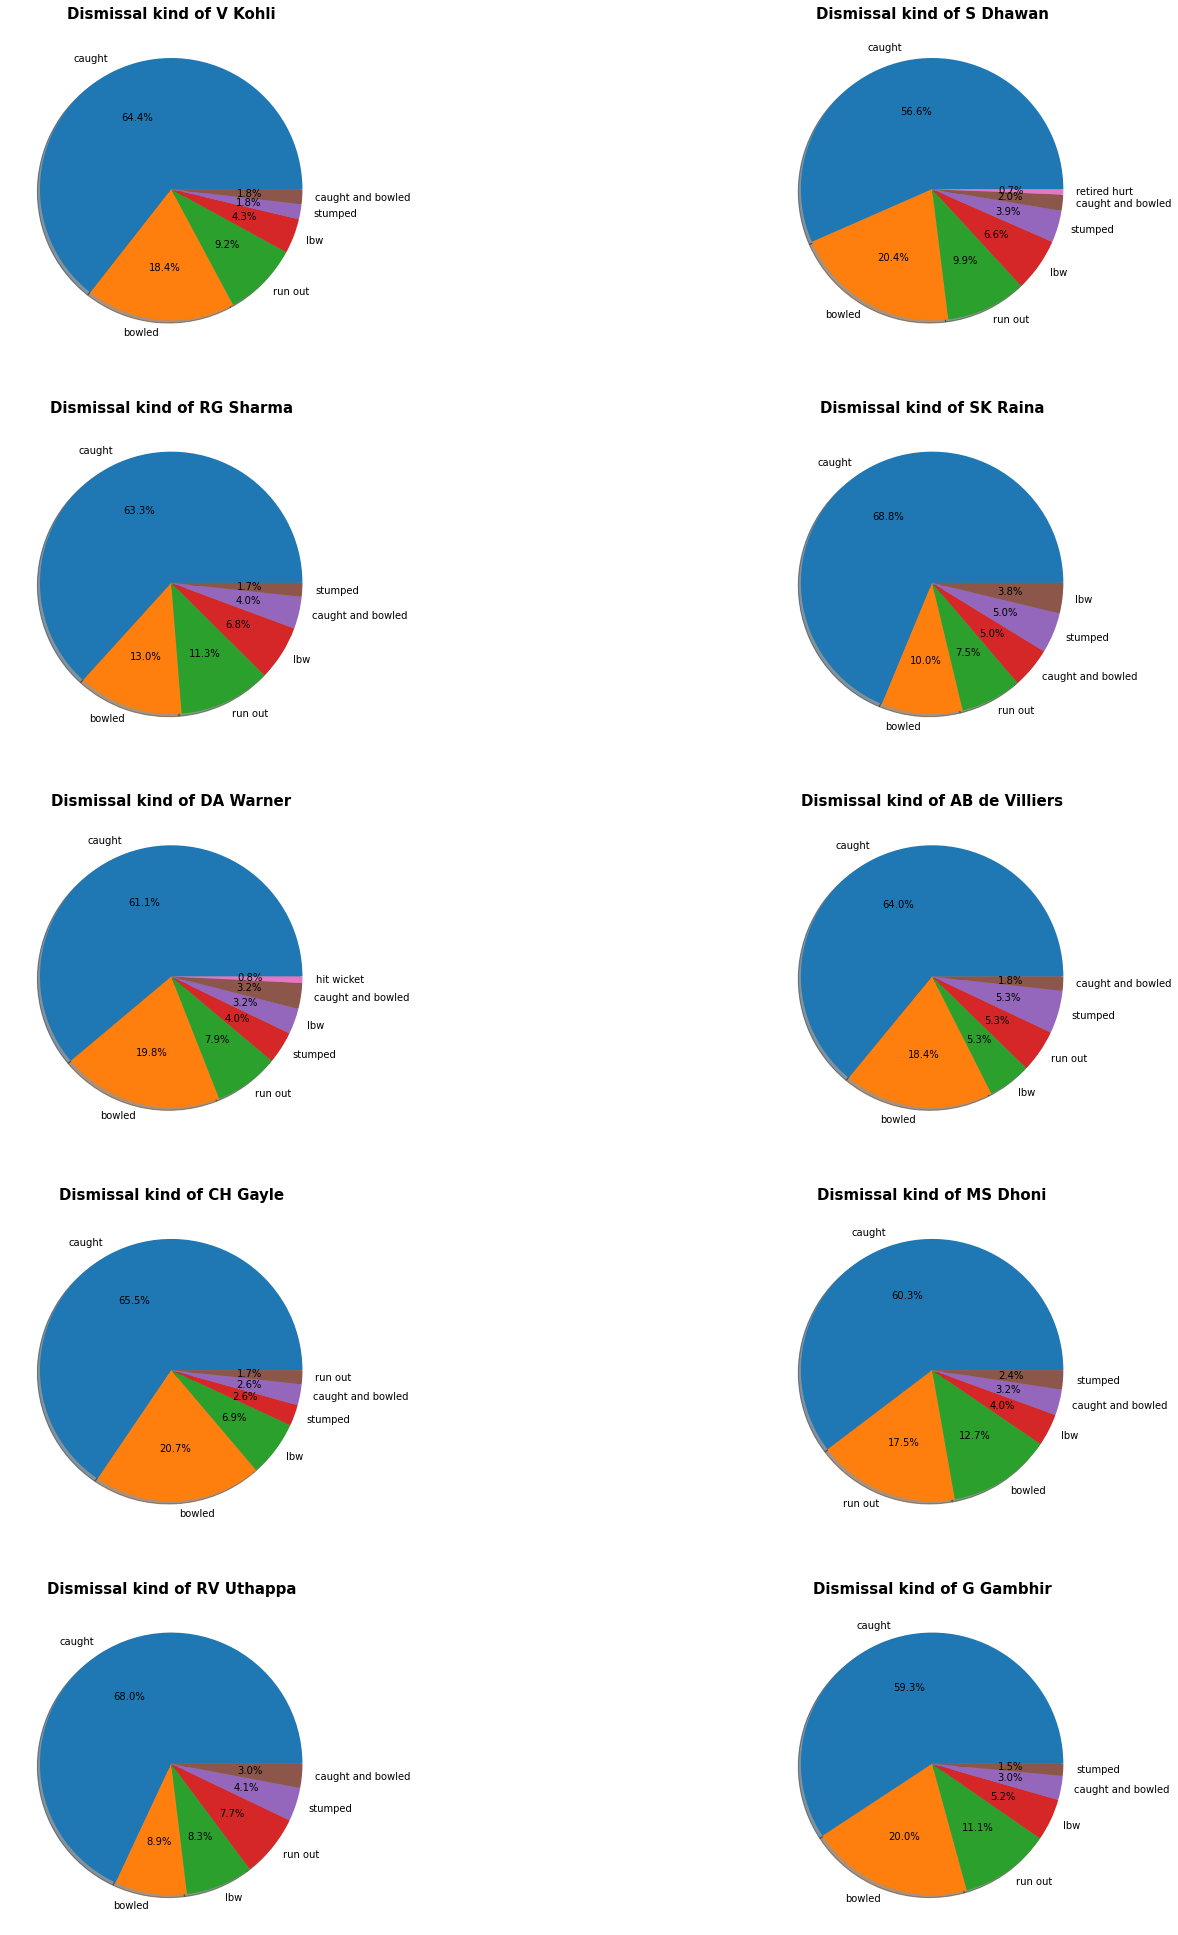

In [43]:
f, ax = plt.subplots(5,2,figsize=(25,35))
ax = ax.flatten()

j=0
for i in topten:
    player = (df_btb['batsman']==i)
    current_player = df_btb[player]
    current_player['dismissal_kind'].value_counts().plot.pie( ax=ax[j],autopct='%1.1f%%', shadow=True,rotatelabels=False)
    ax[j].set_title('Dismissal kind of '+i , fontweight= 'bold', fontsize=15)
    ax[j].set_ylabel('')
    ax[j].set_xlabel('')
    j=j+1

In [44]:
df_m['year'] = df_m['date'].apply(lambda x:x[:4])

In [45]:
df_m.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020


In [46]:
df_allscor = df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli']
df_allscor

id
335982      1
335985     23
335992     13
335996     12
335998      1
           ..
1216534    14
1216540    33
1216544    50
1216547     3
1237178     6
Name: batsman_runs, Length: 184, dtype: int64

In [47]:
def runfilter(k,lst):
    res = filter(lambda x: x>=k and x<k+10,lst)
    return len(list(res))
valcou={}
for i in range(0,120,10):
    valcou[str(i)+"-"+str(i+10)]=runfilter(i,df_allscor)
pieseries = pd.Series(valcou)

In [48]:
valcou

{'0-10': 43,
 '10-20': 35,
 '20-30': 22,
 '30-40': 26,
 '40-50': 14,
 '50-60': 15,
 '60-70': 8,
 '70-80': 9,
 '80-90': 3,
 '90-100': 4,
 '100-110': 4,
 '110-120': 1}

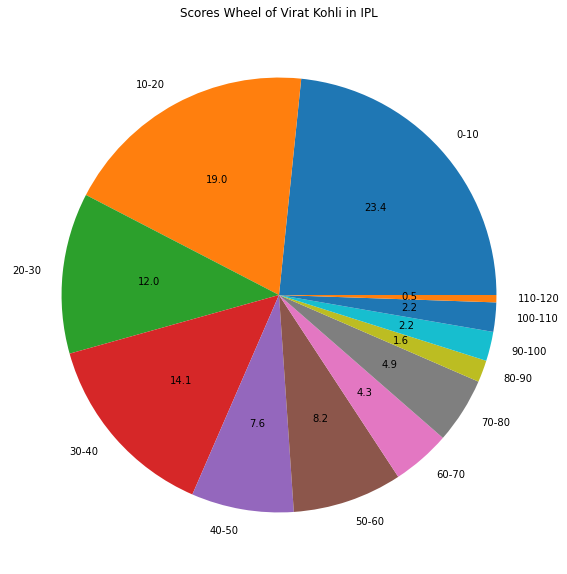

In [49]:
bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=pieseries, autopct="%.1f",labels = valcou.keys())
plt.title("Scores Wheel of Virat Kohli in IPL")
plt.show()

In [50]:
df_chasing = df_m[(df_m['result']=='wickets') & (df_m['winner']=='Royal Challengers Bangalore')]['id']

In [51]:
chasing_wins = len(df_chasing)
chasing_wins

51

In [52]:
vsc=[]
cnt=0
for i in df_chasing:
    try:
        vsc.append(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'][i])
        cnt+=1
    except:
        pass

In [53]:
cnt

45

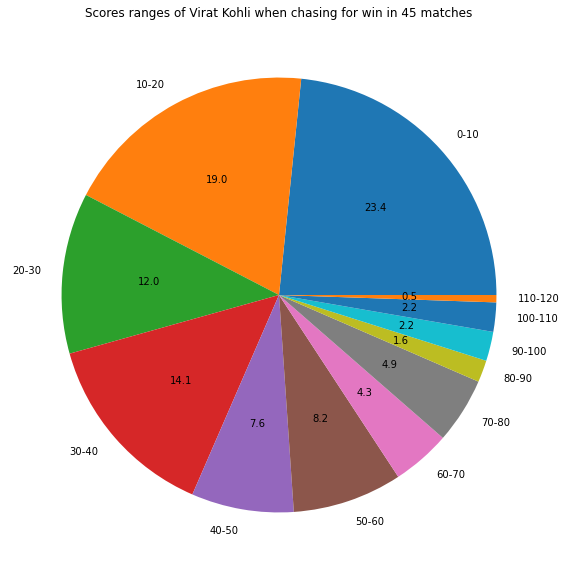

In [54]:
bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=pieseries, autopct="%.1f",labels = valcou.keys())
plt.title("Scores ranges of Virat Kohli when chasing for win in 45 matches")
plt.show()

In [55]:
df_defend = df_m[(df_m['result']=='runs') & (df_m['winner']=='Royal Challengers Bangalore')]['id']

In [56]:
len(df_defend)

38

In [57]:
df_lost = df_m[((df_m['team1']=='Royal Challengers Bangalore') | (df_m['team2']=='Royal Challengers Bangalore')) & (df_m['winner']!='Royal Challengers Bangalore')]['id']

In [58]:
df_lost.shape

(104,)

In [59]:
vslost=[]
cnt=0
for i in df_lost:
    try:
        vslost.append(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'][i])
        cnt+=1
    except:
        pass

In [60]:
dff = pd.DataFrame(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'])

In [61]:
dff['indx']=dff.index
dff.reset_index(inplace=True)
dff.drop('id',axis=1,inplace=True)

In [62]:
dff.head()

,batsman_runs,indx
0,1,335982
1,23,335985
2,13,335992
3,12,335996
4,1,335998


In [63]:
vk_w = dff[dff['batsman_runs']>=100]['indx']

In [64]:
vk_w.shape

(5,)

In [71]:
runs = pd.DataFrame(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'])

In [72]:
balls = pd.DataFrame(df_btb.groupby(['batsman','id'])['ball'].count()['V Kohli'])

In [73]:
rnb=pd.merge(runs,balls,on='id')

In [76]:
rnb['strike_rate']= round(rnb['batsman_runs']/rnb['ball'],3)*100

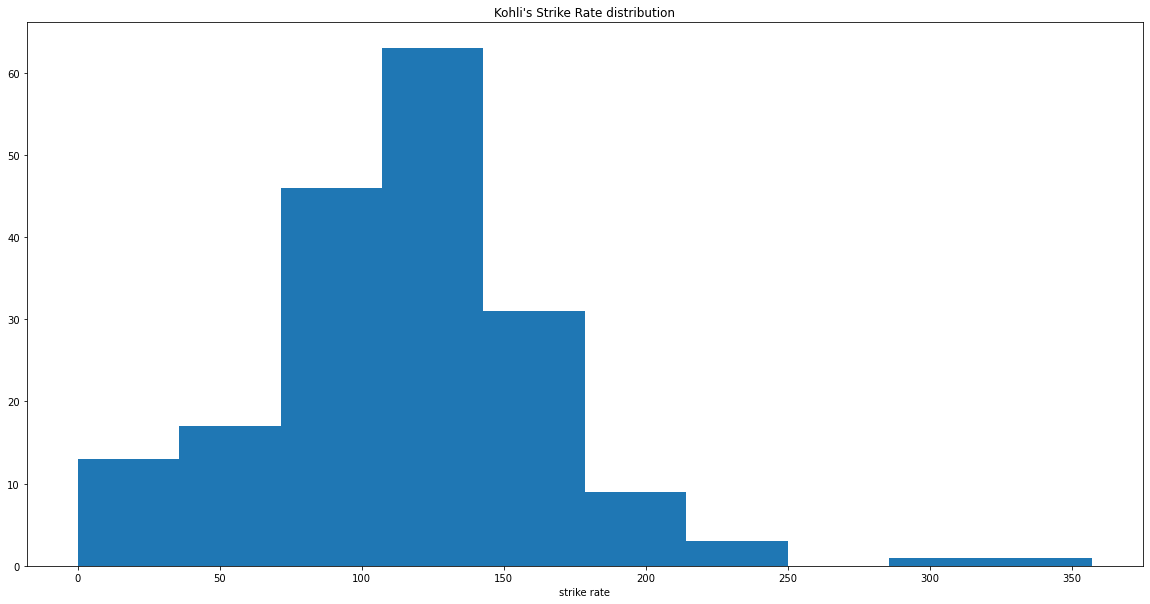

In [77]:
sr = rnb['strike_rate']
plt.figure(figsize=(20,10))
plt.hist(sr,bins=10)
plt.xlabel('strike rate')
plt.title("Kohli's Strike Rate distribution")
plt.show()

In [78]:
rnb[rnb['batsman_runs']>=70]['strike_rate'].mean()

160.03333333333336

In [79]:
rnb[rnb['batsman_runs']>=100]['strike_rate'].mean()

186.92000000000002

In [81]:
def sr(x,y):
    return round(rnb[(rnb['batsman_runs']>=x) & (rnb['batsman_runs']<y)]['strike_rate'].mean(),3)
valcou={}
for i in range(0,120,10):
    valcou[str(i)+'-'+str(i+10)]= sr(i,i+10)
valcou

{'0-10': 65.947,
 '10-20': 113.209,
 '20-30': 128.218,
 '30-40': 122.204,
 '40-50': 129.679,
 '50-60': 136.5,
 '60-70': 138.4,
 '70-80': 147.011,
 '80-90': 148.833,
 '90-100': 164.125,
 '100-110': 178.25,
 '110-120': 221.6}

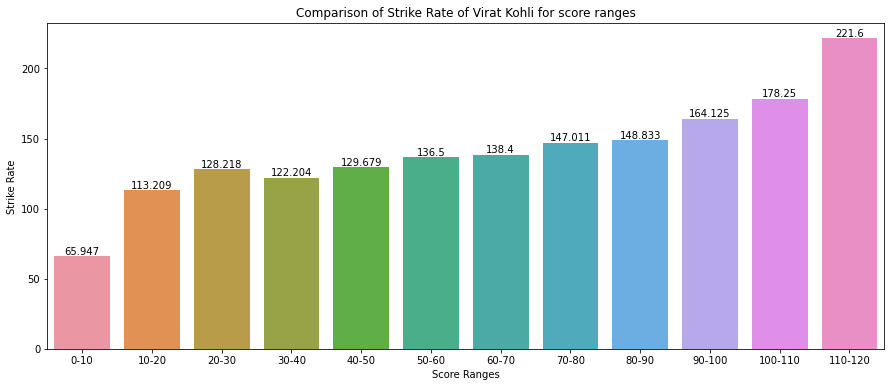

In [82]:
bar, ax= plt.subplots(figsize=(15,6))
k = [i for i in range(0,12)]
a= list(valcou.keys())
b=list(valcou.values())
sns.barplot(x=a,
            y=b
           )
ax.set_xlabel("Score Ranges")
ax.set_ylabel("Strike Rate")
ax.set_title('Comparison of Strike Rate of Virat Kohli for score ranges')
for i in range(len(b)):
    plt.annotate(str(b[i]),xy=(k[i],b[i]),ha='center', va='bottom')
plt.show()

In [83]:
df_m['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [84]:
match_per_season = df_m.groupby(['year'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='PuBu') 

,year,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [85]:
points_table = pd.DataFrame(df_m.groupby(['year'])['winner'].value_counts().unstack(fill_value=100))

In [86]:
points_table['season'] = points_table.index
points_table

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,season
year,,,,,,,,,,,,,,,,
2008,9,2,100,7,100,10,100,6,7,100,13,100,100,4,100,2008
2009,8,9,100,10,100,7,100,3,5,100,6,100,100,9,100,2009
2010,9,8,100,7,100,4,100,7,11,100,6,100,100,8,100,2010
2011,11,6,100,4,100,7,6,8,10,4,6,100,100,10,100,2011
2012,10,4,100,11,100,8,100,12,10,4,7,100,100,8,100,2012
2013,12,100,100,3,100,8,100,6,13,4,11,100,100,9,10,2013
2014,10,100,100,2,100,12,100,11,7,100,7,100,100,5,6,2014
2015,10,100,100,5,100,3,100,7,10,100,7,100,100,8,7,2015
2016,100,100,100,7,9,4,100,8,7,100,100,100,5,9,11,2016


In [87]:
print("-------------------","NUMBER OF GAMES WON BY A TEAM IN EACH SEASON","-------------------------")


for yr in range(2008,2021):
    yr =str(yr)
    t =[]
    table1 = points_table[points_table['season'] == yr]
    for i in points_table[points_table['season'] == yr]:
        if table1[i].name != 'season' and table1[i][yr]!=100:
            t.append((table1[i].name,table1[i][yr]))
    t.sort(key=lambda x:x[1],reverse = True)
    print("=======================",yr,"===========================")
    for item in t:
        print(item[0],"---------------",item[1])
    print()
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print()

------------------- NUMBER OF GAMES WON BY A TEAM IN EACH SEASON -------------------------
======================= 2008 ===========================
Rajasthan Royals --------------- 13
Kings XI Punjab --------------- 10
Chennai Super Kings --------------- 9
Delhi Daredevils --------------- 7
Mumbai Indians --------------- 7
Kolkata Knight Riders --------------- 6
Royal Challengers Bangalore --------------- 4
Deccan Chargers --------------- 2

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

======================= 2009 ===========================
Delhi Daredevils --------------- 10
Deccan Chargers --------------- 9
Royal Challengers Bangalore --------------- 9
Chennai Super Kings --------------- 8
Kings XI Punjab --------------- 7
Rajasthan Royals --------------- 6
Mumbai Indians --------------- 5
Kolkata Knight Riders --------------- 3

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [88]:
six=df_btb.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,6s
0,CH Gayle,349
1,AB de Villiers,235
2,MS Dhoni,216
3,RG Sharma,214
4,V Kohli,202
5,KA Pollard,198
6,DA Warner,195
7,SK Raina,194
8,SR Watson,190
9,RV Uthappa,163


In [89]:
fours=df_btb.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours.columns=['Batsman','4s']
fours.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,6s
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504
3,SK Raina,493
4,G Gambhir,492
5,RG Sharma,458
6,RV Uthappa,454
7,AM Rahane,416
8,AB de Villiers,390
9,CH Gayle,384


In [91]:
team = df_btb['batting_team'].unique()
team_runs = []
for var in team:
    temp_df = df_btb[df_btb['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([0,1,2,3,4,5])]
    runs = temp_df['total_runs'].sum()
    team_runs.append(runs)
team = pd.DataFrame(data=team_runs, index=team,columns=['Runs In First 6 Overs'])
#team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team.index.name = 'Team'

In [92]:
tms = list(team.index)

In [93]:
tmscr = list(team['Runs In First 6 Overs'])

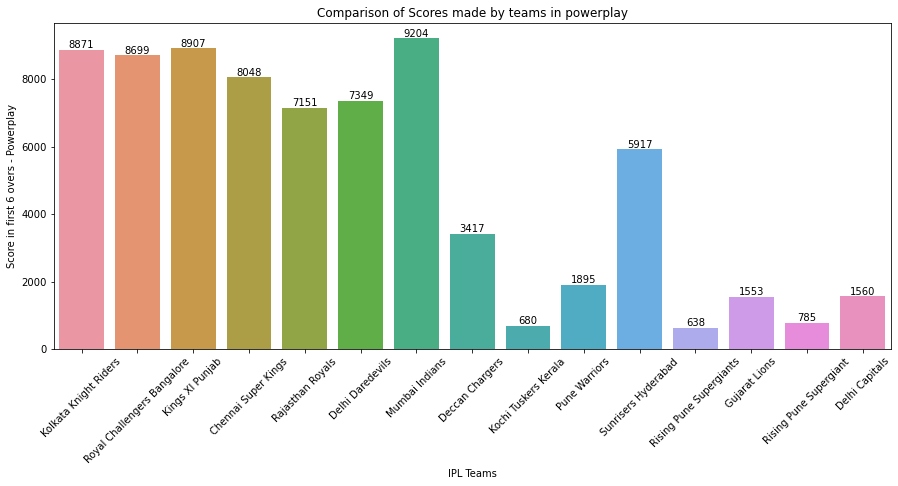

In [94]:
bar, ax= plt.subplots(figsize=(15,6))
ttstrike=[]
k = [i for i in range(0,15)]
sns.barplot(x=tms,
            y= tmscr
           )
ax.set_xlabel("IPL Teams")
ax.set_ylabel("Score in first 6 overs - Powerplay")
ax.set_title('Comparison of Scores made by teams in powerplay')
plt.xticks(rotation=45)
for i in range(len(tmscr)):
    plt.annotate(str(tmscr[i]),xy=(k[i],tmscr[i]),ha='center', va='bottom')
plt.show()

In [96]:
max_runs=df_btb.groupby(['batsman'])['batsman_runs'].sum()
a=df_btb.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c

,type,count
batsman,,
V Kohli,1,1919
V Kohli,2,346
V Kohli,4,504
V Kohli,6,202
SK Raina,1,1666
SK Raina,2,264
SK Raina,4,493
SK Raina,6,194
DA Warner,1,1348


In [97]:
filt=(df_btb['batsman']=='V Kohli')
df_kohli=df_btb[filt]
df_kohli.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [98]:
len(df_kohli[df_kohli['batsman_runs']==4])

504

In [99]:
len(df_kohli[df_kohli['batsman_runs']==6])

202

In [100]:
df_kohli['total_runs'].sum() #including extras

6081

In [101]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

In [102]:

print("KOHLI's way of scoring runs")
print("Runs scored from 1's :",count(df_kohli,1))
print("Runs scored from 2's :",count(df_kohli,2))
print("Runs scored from 3's :",count(df_kohli,3))
print("Runs scored from 4's :",count(df_kohli,4))
print("Runs scored from 6's :",count(df_kohli,6))

KOHLI's way of scoring runs
Runs scored from 1's : 1919
Runs scored from 2's : 692
Runs scored from 3's : 39
Runs scored from 4's : 2016
Runs scored from 6's : 1212


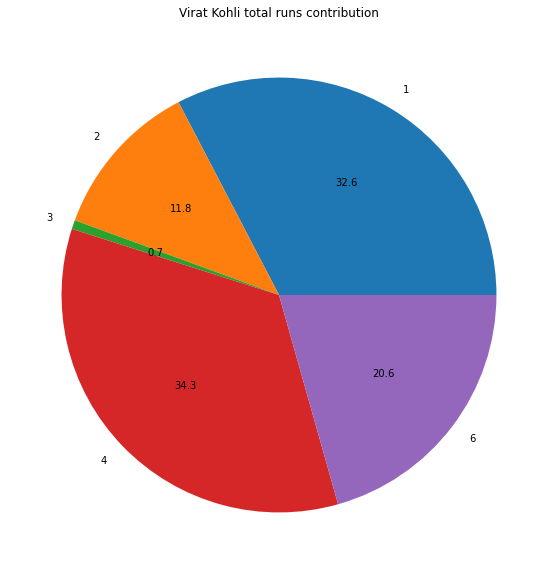

In [103]:
values=[1919,692,39,2016,1212]
labels=[1,2,3,4,6]
bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=values, autopct="%.1f",labels =labels)
plt.title("Virat Kohli total runs contribution")
plt.show()

In [104]:
df_kohli[(df_kohli['dismissal_kind']!='run out') & (df_kohli['dismissal_kind'].notna())]['bowler'].count()

148

In [105]:
df_kohli[(df_kohli['dismissal_kind']!='run out') & (df_kohli['dismissal_kind'].notna())]['bowler'].value_counts().sort_values(ascending=False)

Sandeep Sharma     7
A Nehra            6
MJ McClenaghan     4
Mohammed Shami     4
DS Kulkarni        4
                  ..
JP Behrendorff     1
K Gowtham          1
Harbhajan Singh    1
KH Pandya          1
JO Holder          1
Name: bowler, Length: 95, dtype: int64

In [106]:
df_non = pd.DataFrame(df_kohli['non_striker'].value_counts())

In [107]:
df_non.columns

Index(['non_striker'], dtype='object')

In [108]:
df_non.sort_values(by='non_striker',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,non_striker
AB de Villiers,1026
CH Gayle,965
PA Patel,234
KL Rahul,194
D Padikkal,158
JH Kallis,147
SS Tiwary,108
TM Dilshan,108
LRPL Taylor,100
MC Henriques,99


In [109]:
df_btb[((df_btb['batsman']=='V Kohli') & (df_btb['non_striker']=='AB de Villiers'))|((df_btb['batsman']=='AB de Villiers') & (df_btb['non_striker']=='V Kohli'))]['total_runs'].sum()

3123

In [110]:
df_btb[((df_btb['batsman']=='V Kohli') & (df_btb['non_striker']=='AB de Villiers'))|((df_btb['batsman']=='AB de Villiers') & (df_btb['non_striker']=='V Kohli'))]['extra_runs'].sum()

94

In [111]:
df_btb[((df_btb['batsman']=='V Kohli') & (df_btb['non_striker']=='CH Gayle'))|((df_btb['batsman']=='CH Gayle') & (df_btb['non_striker']=='V Kohli'))]['total_runs'].sum()

2787

In [112]:
df_btb[((df_btb['batsman']=='V Kohli') & (df_btb['non_striker']=='CH Gayle'))|((df_btb['batsman']=='CH Gayle') & (df_btb['non_striker']=='V Kohli'))]['extra_runs'].sum()

152

In [113]:
df_total = df_btb.groupby("id")['total_runs'].sum().sort_values(ascending=False)
df_total2 = df_btb.groupby("id")['total_runs'].sum().sort_values()

In [117]:
high_total_mat=list(df_total.head(10).index)
low_total_mat = list(df_total2.head(10).index)

In [118]:
mat1 =[]
for i in high_total_mat:
    a=df_m[df_m['id']==i]['team1'].item()
    b=df_m[df_m['id']==i]['team2'].item()
    mat1.append(a+" VS "+b)
mat2 =[]
for i in low_total_mat:
    a=df_m[df_m['id']==i]['team1'].item()
    b=df_m[df_m['id']==i]['team2'].item()
    mat2.append(a+" VS "+b)
mat2

['Delhi Daredevils VS Pune Warriors',
 'Royal Challengers Bangalore VS Rajasthan Royals',
 'Mumbai Indians VS Kolkata Knight Riders',
 'Kings XI Punjab VS Delhi Daredevils',
 'Rajasthan Royals VS Royal Challengers Bangalore',
 'Chennai Super Kings VS Royal Challengers Bangalore',
 'Rising Pune Supergiant VS Kings XI Punjab',
 'Sunrisers Hyderabad VS Delhi Daredevils',
 'Delhi Daredevils VS Kings XI Punjab',
 'Kolkata Knight Riders VS Rajasthan Royals']

In [119]:
high_tot = list(df_total.head(10))
low_tot = list(df_total2.head(10))

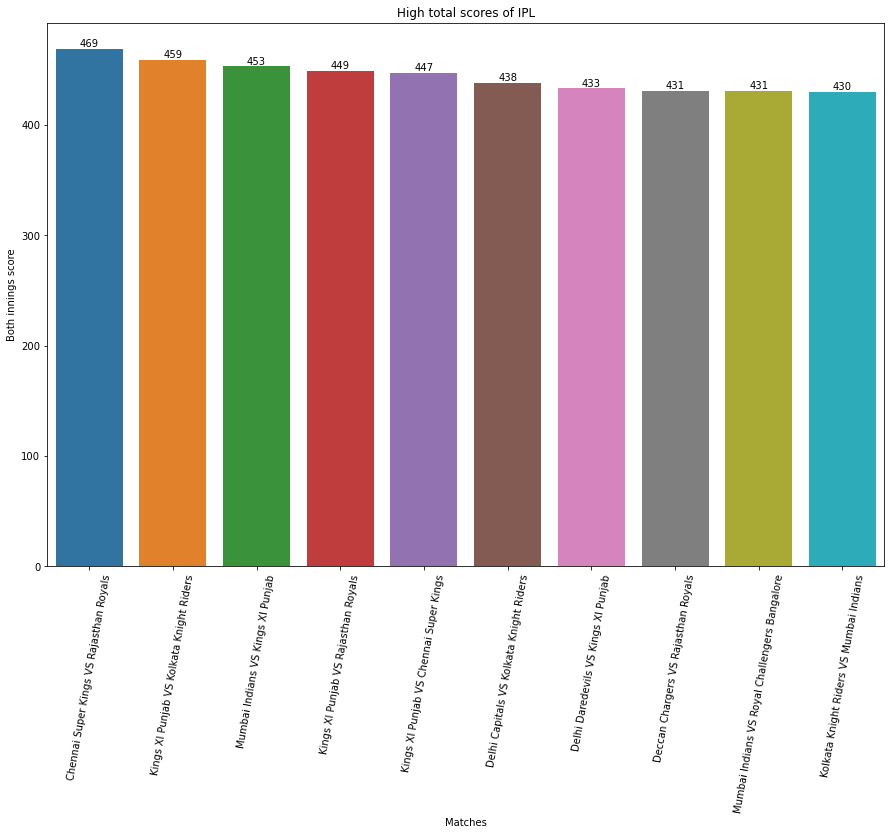

In [120]:
bar, ax= plt.subplots(figsize=(15,10))
k = [i for i in range(0,10)]

sns.barplot(x=mat1,
            y=high_tot
           )
ax.set_xlabel("Matches")
ax.set_ylabel("Both innings score")
ax.set_title('High total scores of IPL')
plt.xticks(rotation=80)
for i in range(len(high_tot)):
    plt.annotate(str(high_tot[i]),xy=(k[i],high_tot[i]),ha='center', va='bottom')
plt.show()

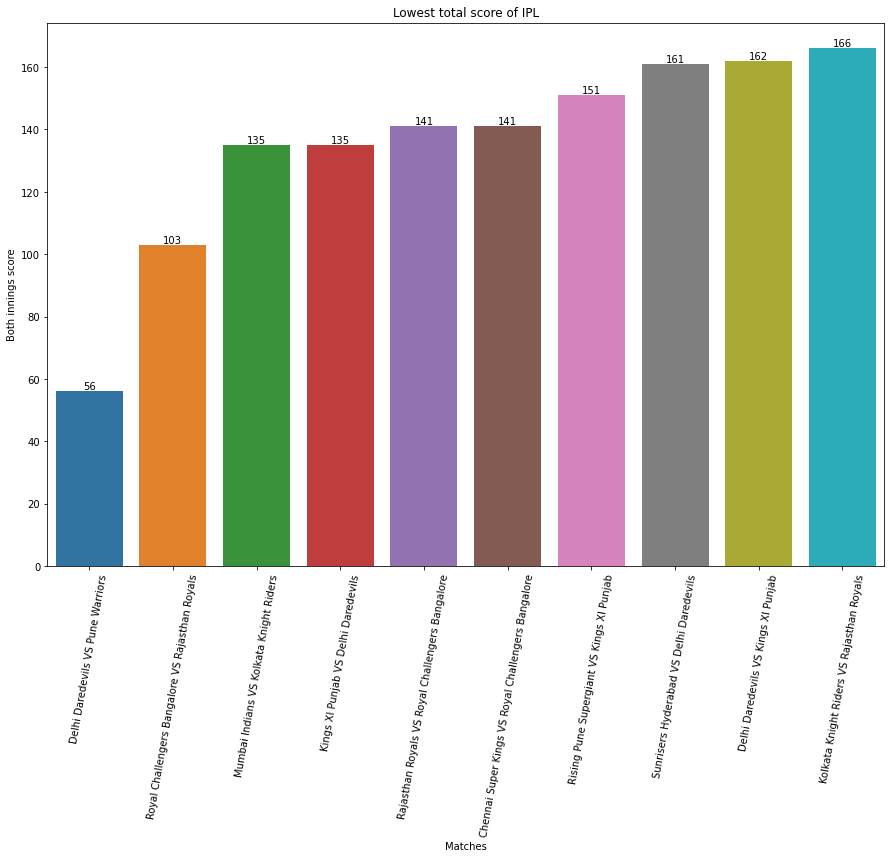

In [121]:
bar, ax= plt.subplots(figsize=(15,10))
k = [i for i in range(0,10)]

sns.barplot(x=mat2,
            y=low_tot
           )
ax.set_xlabel("Matches")
ax.set_ylabel("Both innings score")
ax.set_title("Lowest total score of IPL")
plt.xticks(rotation=80)
for i in range(len(low_tot)):
    plt.annotate(str(low_tot[i]),xy=(k[i],low_tot[i]),ha='center', va='bottom')
plt.show()

In [122]:
df_btb.groupby(['batsman','non_striker','id'])['batsman_runs'].sum().sort_values(ascending=False).head(15)

batsman         non_striker     id     
AB de Villiers  V Kohli         829795     133
                                980987     129
CH Gayle        V Kohli         548372     127
                TM Dilshan      598027     127
JM Bairstow     DA Warner       1175366    114
DA Warner       NV Ojha         548329     109
RG Sharma       HH Gibbs        548363     109
AC Gilchrist    VVS Laxman      335994     109
MA Agarwal      KL Rahul        1216527    106
AC Gilchrist    SE Marsh        501260     105
DA Warner       S Dhawan        1082627    104
JM Bairstow     DA Warner       1216542     97
V Kohli         AB de Villiers  980987      97
DA Miller       R Sathish       598064      93
CA Lynn         G Gambhir       1082593     93
Name: batsman_runs, dtype: int64

In [125]:
vk_mat_ids=list(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'].sort_values(ascending = False).index)
df_m['venue']=df_m['venue'].apply(lambda x: 'M Chinnaswamy Stadium' if x=='M.Chinnaswamy Stadium' else x)

In [126]:
ven = []
score =[]
for i in vk_mat_ids:
    ven.append(df_m[df_m['id']==i]['venue'].item())
    score.append(df_btb.groupby(['batsman','id'])['batsman_runs'].sum()['V Kohli'][i])
df_ven=pd.DataFrame()
df_ven['venue']=ven
df_ven['score']=score
df_ven['venue'].value_counts().head(10)

M Chinnaswamy Stadium                         72
Wankhede Stadium                              10
MA Chidambaram Stadium, Chepauk                9
Eden Gardens                                   9
Feroz Shah Kotla                               9
Dubai International Cricket Stadium            9
Rajiv Gandhi International Stadium, Uppal      9
Sawai Mansingh Stadium                         7
Sheikh Zayed Stadium                           6
Punjab Cricket Association Stadium, Mohali     5
Name: venue, dtype: int64

In [129]:
fourmore = list(df_ven['venue'].value_counts().head(13).index)

In [130]:
ven_avg=[]
for i in fourmore:
    print(i)
    ven_avg.append(round(df_ven[df_ven['venue']==i]['score'].mean(),2))
    print(str(df_ven[df_ven['venue']==i]['score'].mean()))
    print("===============================================")

M Chinnaswamy Stadium
32.583333333333336
Wankhede Stadium
40.0
MA Chidambaram Stadium, Chepauk
32.333333333333336
Eden Gardens
34.111111111111114
Feroz Shah Kotla
47.55555555555556
Dubai International Cricket Stadium
27.555555555555557
Rajiv Gandhi International Stadium, Uppal
37.22222222222222
Sawai Mansingh Stadium
18.714285714285715
Sheikh Zayed Stadium
25.833333333333332
Punjab Cricket Association Stadium, Mohali
20.0
Sharjah Cricket Stadium
33.6
Maharashtra Cricket Association Stadium
38.75
Kingsmead
18.75


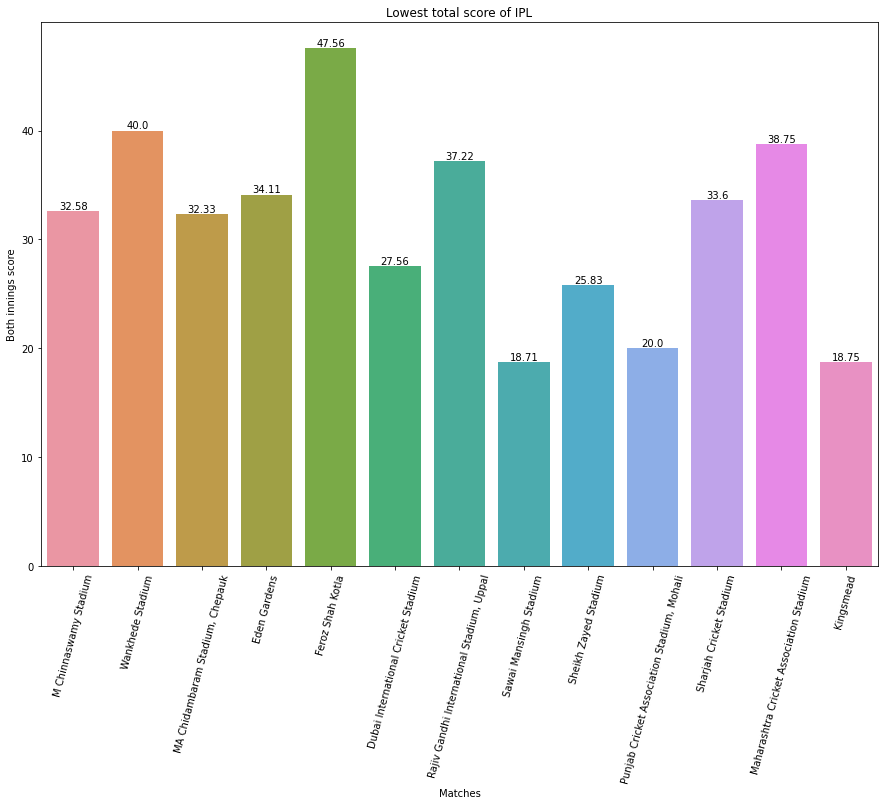

In [131]:
bar, ax= plt.subplots(figsize=(15,10))
k = [i for i in range(0,13)]

sns.barplot(x=fourmore,
            y=ven_avg
           )
ax.set_xlabel("Matches")
ax.set_ylabel("Both innings score")
ax.set_title("Lowest total score of IPL")
plt.xticks(rotation=75)
for i in range(len(ven_avg)):
    plt.annotate(str(ven_avg[i]),xy=(k[i],ven_avg[i]),ha='center', va='bottom')
plt.show()

In [132]:
df_yr = pd.DataFrame(df_m.groupby(['year'])['id'].value_counts())

In [133]:
mat_ids = list(df_yr.index)

In [134]:
vk_season_runs=[]
for yr in range(2008,2021):
    lst=[]
    cnt=0
    print("================================"+str(yr)+"===================================")
    for i in mat_ids:
        if i[0]==str(yr):
            lst.append(i[1])
    for i in lst:
        cnt+=df_btb[(df_btb['id']==i) & (df_btb['batsman']=="V Kohli")]['batsman_runs'].sum()
    vk_season_runs.append(cnt)
    print(cnt)

================================2008===================================
165
================================2009===================================
246
================================2010===================================
307
================================2011===================================
557
================================2012===================================
364
================================2013===================================
634
================================2014===================================
359
================================2015===================================
505
================================2016===================================
973
================================2017===================================
308
================================2018===================================
530
================================2019===================================
464
================================2020===================================
466


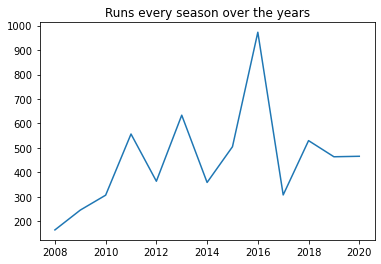

In [135]:
plt.plot(list(range(2008,2021)),vk_season_runs)
plt.title("Runs every season over the years")
plt.show()

In [136]:
high_scores=df_btb.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
score_200=high_scores[high_scores['total_runs']>=200].sort_values('total_runs',ascending=False)
score_200.head(5)

,id,inning,batting_team,bowling_team,total_runs
700,598027,1,Royal Challengers Bangalore,Pune Warriors,263
1116,980987,1,Royal Challengers Bangalore,Gujarat Lions,248
292,419137,1,Chennai Super Kings,Rajasthan Royals,246
1354,1136604,1,Kolkata Knight Riders,Kings XI Punjab,245
2,335983,1,Chennai Super Kings,Kings XI Punjab,240


In [137]:
x1=score_200['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1.style.background_gradient(cmap='PuBu')

,batting_team
Royal Challengers Bangalore,18
Chennai Super Kings,17
Kings XI Punjab,14
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,12
Rajasthan Royals,9
Delhi Daredevils,5
Delhi Capitals,2
Deccan Chargers,1


In [140]:
x1=score_200[score_200['inning']==1]['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1.style.background_gradient(cmap='PuBu')

,batting_team
Royal Challengers Bangalore,16
Chennai Super Kings,11
Mumbai Indians,11
Sunrisers Hyderabad,10
Kolkata Knight Riders,8
Kings XI Punjab,8
Rajasthan Royals,5
Delhi Daredevils,4
Delhi Capitals,2
Deccan Chargers,1


In [141]:
x1=score_200[score_200['inning']==2]['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1.style.background_gradient(cmap='PuBu')

,batting_team
Kings XI Punjab,6
Chennai Super Kings,6
Rajasthan Royals,4
Kolkata Knight Riders,4
Mumbai Indians,3
Royal Challengers Bangalore,2
Sunrisers Hyderabad,2
Delhi Daredevils,1


In [142]:
score_200[(score_200['inning']==1)&(score_200['bowling_team']=='Royal Challengers Bangalore')].shape[0]

11

In [143]:
mats = score_200[(score_200['inning']==1)&(score_200['bowling_team']=='Royal Challengers Bangalore')]['id']
for i in mats:
    print(df_m[df_m['id']==i]['winner'].item())

Kings XI Punjab
Sunrisers Hyderabad
Kolkata Knight Riders
Rajasthan Royals
Mumbai Indians
Mumbai Indians
Sunrisers Hyderabad
Sunrisers Hyderabad
Kings XI Punjab
Chennai Super Kings
Royal Challengers Bangalore


In [144]:
z=score_200['bowling_team'].value_counts()
z=pd.DataFrame(z)
z.style.background_gradient(cmap='PuBu')

,bowling_team
Kings XI Punjab,20
Royal Challengers Bangalore,17
Chennai Super Kings,12
Delhi Daredevils,11
Rajasthan Royals,10
Kolkata Knight Riders,10
Mumbai Indians,8
Sunrisers Hyderabad,7
Gujarat Lions,3
Delhi Capitals,3


In [145]:
df_m[df_m['result_margin']>120]['winner'].value_counts()

Royal Challengers Bangalore    3
Kolkata Knight Riders          1
Mumbai Indians                 1
Name: winner, dtype: int64

In [146]:
df_m[(df_m['result']=='wickets')&(df_m['result_margin'].isin([9]))]['winner'].value_counts()

Royal Challengers Bangalore    8
Delhi Daredevils               6
Mumbai Indians                 6
Chennai Super Kings            5
Kolkata Knight Riders          4
Sunrisers Hyderabad            4
Kings XI Punjab                2
Rajasthan Royals               2
Rising Pune Supergiants        1
Rising Pune Supergiant         1
Name: winner, dtype: int64

In [147]:
df_m[(df_m['result']=='wickets')&(df_m['result_margin'].isin([8,9]))]['winner'].value_counts()

Royal Challengers Bangalore    15
Kolkata Knight Riders          15
Mumbai Indians                 14
Delhi Daredevils               12
Chennai Super Kings            12
Rajasthan Royals               11
Kings XI Punjab                 9
Sunrisers Hyderabad             8
Kochi Tuskers Kerala            2
Deccan Chargers                 1
Rising Pune Supergiants         1
Rising Pune Supergiant          1
Name: winner, dtype: int64

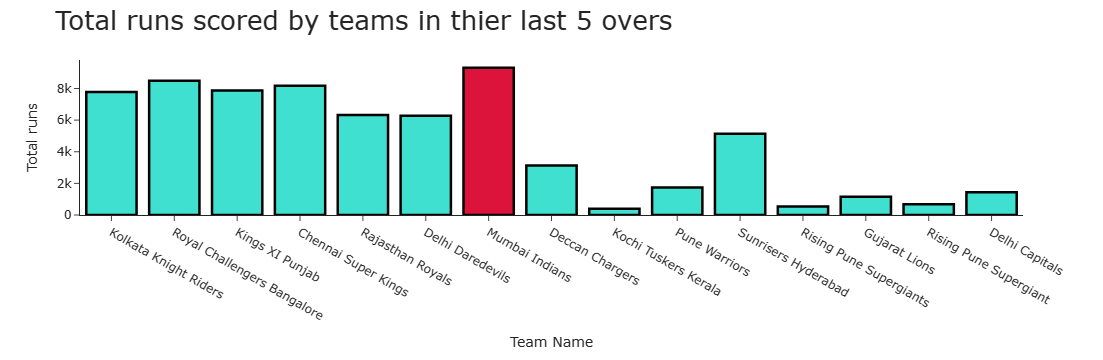

In [148]:
team1 = df_btb['batting_team'].unique()
team_runs1 = []
for var in team1:
    temp_df = df_btb[df_btb['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([19,18,17,16,15])]
    runs1 = temp_df['total_runs'].sum()
    team_runs1.append(runs1)
team1 = pd.DataFrame(data=team_runs1, index=team1,columns=['Runs In Last 5 Overs'])
# team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team1.index.name = 'Team'
colors = ['turquoise',] * 15
colors[6] = 'crimson'
fig=px.bar(x=team1.index,y=team1['Runs In Last 5 Overs'],labels=dict(x="Team Name",y="Total runs"),)
fig.update_layout(title="Total runs scored by teams in thier last 5 overs",
                  titlefont={'size': 26},template='simple_white'     
                  ) 
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()